In [1]:
import numpy as np

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Data=pd.read_csv('diabetes_dataset.csv')


In [4]:
y=Data['Outcome']


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

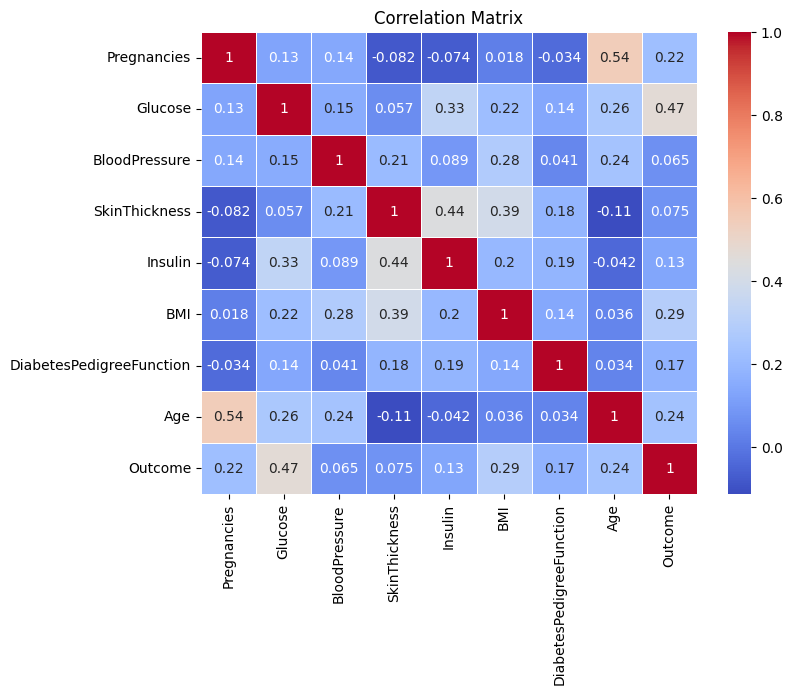

In [5]:
corr_matrix = Data.corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
Data.drop('Outcome',axis=1,inplace=True)
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
Data=(Data-Data.mean())/Data.std()
y=(y-y.mean())/y.std()

In [8]:
x=Data.values
y=y.values

In [9]:
y= y.reshape(-1, 1)

In [10]:
x.shape

(768, 8)

In [11]:
theta=np.zeros((8,1))
def sigmoid_func(x,theta):
    z=np.dot(x,theta)
    sig=1/(1+np.exp(-z))
    return sig



In [12]:
def gradient(x,theta,itera,learning_rate):
    loss_history=np.zeros(itera);
    for i in range(itera):
        h_theta=sigmoid_func(x,theta)
        gradient=np.sum(np.dot(x.T,(y-h_theta)))
        theta=theta+learning_rate*gradient
        loss_history[i]=np.sum(np.dot(y.T,np.log((h_theta)))+np.dot((1-y).T,np.log((h_theta))))
        return theta,loss_history

In [13]:
itera=30
learning_rate=0.01
theta,loss_history=gradient(x,theta,itera,learning_rate)
y_pred=sigmoid_func(x,theta)
y_prec=np.zeros((768,1))
k=0
for i in y_pred:
    if(i<0.5):
        y_prec[k]=0
    else:
        y_prec[k]=1;
    k+=1

Data1=pd.read_csv('diabetes_dataset.csv')
y_actual=Data1['Outcome']
y_a=y_actual.values
y_a=y_a.reshape(-1,1)

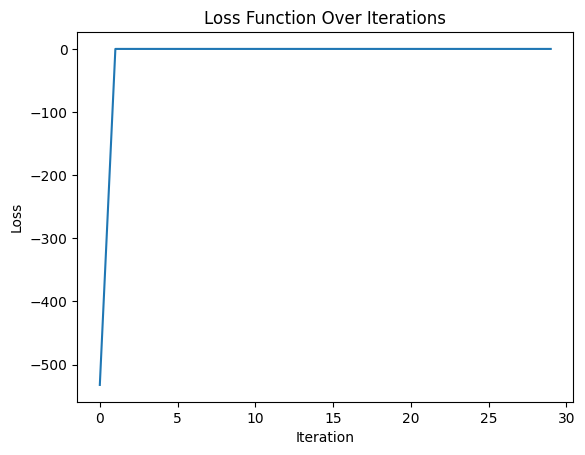

In [14]:
plt.plot(range(itera), loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function Over Iterations")
plt.show()

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_a, y_prec)

# Display the F1 score
print("F1 Score:", f1)


F1 Score: 0.6192733017377567


In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_a, y_prec)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69
